In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import ShuffleSplit, GridSearchCV, train_test_split, cross_val_score

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import mean_absolute_error

import pickle
import json
import re

In [2]:
%matplotlib inline

In [3]:
real_estate = pd.read_csv("G:\Data Science\Dataset\House Prices\house-price-bengalura\Bengaluru_Real_Estate.csv",)

In [4]:
real_estate.sample(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
9669,Super built-up Area,Ready To Move,Parappana Agrahara,2 BHK,NaN,1194,2.0,2.0,45.0
11669,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,67.5
9836,Super built-up Area,Ready To Move,Thanisandra,3 BHK,Bhmesy,1595,3.0,1.0,105.0
583,Super built-up Area,Ready To Move,Whitefield,3 BHK,Toindls,2500,3.0,2.0,313.0
6401,Plot Area,Ready To Move,Ananth Nagar,4 Bedroom,NaN,1200,3.0,1.0,87.0
5249,Super built-up Area,Ready To Move,9th Phase JP Nagar,2 BHK,NaN,660,2.0,0.0,27.0
9004,Super built-up Area,Ready To Move,Bisuvanahalli,3 BHK,Prityel,1075,2.0,1.0,47.0
12634,Super built-up Area,Ready To Move,Gulimangala,2 BHK,Daxir E,980,2.0,3.0,35.0
6319,Plot Area,Ready To Move,TC Palaya,4 Bedroom,NaN,600,4.0,0.0,65.0
3672,Super built-up Area,20-Dec,Whitefield,2 BHK,VaarkMe,1269,2.0,1.0,75.0


In [5]:
real_estate.shape

(13320, 9)

In [6]:
real_estate.groupby("area_type")["area_type"].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
real_estate.drop(['area_type', 'society', 'balcony', 'availability'], axis=1, inplace=True)

In [8]:
real_estate.sample(10)

,location,size,total_sqft,bath,price
2663,Sector 4 HSR Layout,4 Bedroom,2400,4.0,700.00
8273,V.V Puram,3 BHK,151.11Sq. Yards,2.0,150.00
4444,Whitefield,4 BHK,3252,4.0,280.00
12643,Electronics City Phase 1,1 BHK,640,1.0,45.00
932,Ambedkar Nagar,3 BHK,1935,4.0,130.00
8316,Gowdanapalya,1 Bedroom,510,1.0,34.00
10590,RMC YARD,7 Bedroom,1900,3.0,162.00
8685,8th Phase JP Nagar,4 Bedroom,2600,4.0,115.00
6569,TC Palaya,2 Bedroom,900,2.0,55.00
2738,Balagere,2 BHK,1012,2.0,54.59


In [9]:
real_estate.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
real_estate.dropna(inplace=True)

In [11]:
real_estate.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
real_estate["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
# Remove the white spaces
real_estate["bhk"] = real_estate["size"].apply(lambda x: int(x.split(' ')[0]))

In [14]:
real_estate.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4
8,Marathahalli,3 BHK,1310,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00,6


In [15]:
real_estate["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [16]:
# Return the bool values  for data type 
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [17]:
# Get the non float types
real_estate_total_sqft = real_estate['total_sqft'].apply(is_float)
real_estate_convert = real_estate[real_estate_total_sqft == False]

In [18]:
real_estate_convert.sample(10)

,location,size,total_sqft,bath,price,bhk
6229,Bannerghatta Road,3 BHK,1365 - 1700,3.0,84.290,3
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
7520,Doddaballapur,3 BHK,1100Sq. Meter,2.0,48.000,3
5708,Jigani,4 Bedroom,133.3Sq. Yards,3.0,160.000,4
11389,Electronic City Phase II,4 BHK,2150 - 2225,4.0,105.000,4
6769,8th Phase JP Nagar,3 BHK,1408 - 1455,3.0,72.020,3
775,Basavanagara,1 BHK,1000Sq. Meter,2.0,93.000,1
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
12334,Budigere,1 BHK,650 - 760,1.0,34.545,1
10569,Devanahalli,2 BHK,1230 - 1490,2.0,62.425,2


In [19]:
# Initialize an empty list to store non-digit values
all_non_digtis = set()

# Loop through each value in the 'total_sqft' column of real_estate_convert
for value in real_estate_convert['total_sqft']:

    # Find all non-digit sequences in the value
    non_digits = re.findall(r'[^\d]+', value)

    # None digtis to set with removing duplicates
    for value in non_digits:
        all_non_digtis.add(value)

# Convert set to list
all_non_digtis = list((all_non_digtis))
all_non_digtis

[' - ',
 'Acres',
 'Guntha',
 '.',
 'Grounds',
 'Sq. Yards',
 'Cents',
 'Sq. Meter',
 'Perch']

In [20]:
# Join all_non_digits list elements with a '|' to create a regex pattern
patterns = '|'.join(all_non_digtis)
# Filter rows where 'total_sqft' contains the pattern
real_estate_convert[real_estate_convert["total_sqft"].str.contains(patterns)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [21]:
def convert_sqft_num(value):
    # Split the value into numeric and non-numeric parts
    non_numeric = re.split(r'(\d+(?:\.\d+)?)', value)
    numeric = re.findall(r'(\d+(?:\.\d+)?)', value)

    # Conversion cases based on non-numeric parts
    if ' - ' in non_numeric:
        # Average of the two numeric parts
        return float(float(numeric[0]) + float(numeric[1]) / 2.0)
    elif '.' in non_numeric:
        # Average of the two numeric parts
        return float(float(numeric[0]) + float(numeric[1]) / 2.0)
    elif 'Cents' in non_numeric:
        # Convert Cents to Square Feet
        return float(float(numeric[0]) * 435.6)
    elif 'Guntha' in non_numeric:
        # Convert Guntha to Square Feet
        return float(float(numeric[0]) * 1089.0)
    elif 'Sq. Meter' in non_numeric:
        # Convert Square Meter to Square Feet
        return float(float(numeric[0]) * 10.76)
    elif 'Sq. Yards' in non_numeric:
        # Convert Square Yards to Square Feet
        return float(float(numeric[0]) * 9.0)
    elif 'Acres' in non_numeric:
        # Convert Acres to Square Feet
        return float(float(numeric[0]) * 43560.0)
    elif str.isdigit(value):
        # Direct conversion if the value is a digit
        return float(value)
    else:
        # Return the value as is if no conversion matches
        return value

In [22]:
real_estate["total_sqft"] = real_estate["total_sqft"].apply(convert_sqft_num)

In [23]:
real_estate.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [24]:
non_digits_rows = real_estate[real_estate["total_sqft"].apply(is_float) == False]

In [25]:
# Drop the remaining non numeric rows in total_sqft
real_estate.drop(non_digits_rows.index, axis=0, inplace=True)

In [26]:
# Updating the "bhk" column to represent the number of bedrooms
# Dropping the "size" column because "bhk" is now being used
real_estate.drop("size", axis=1, inplace=True)

In [27]:
# Converting the "total_sqft" column to float data type
real_estate["total_sqft"] = real_estate["total_sqft"].astype(float)

In [28]:
# Calculate the price per square foot
real_estate["price_per_sqft"] = real_estate["price"]*100000/real_estate["total_sqft"]

In [29]:
real_estate.sample(10)

,location,total_sqft,bath,price,bhk,price_per_sqft
9059,Bellandur,1410.0000,3.0,92.00,2,6524.822695
5976,1st Phase JP Nagar,839.6028,1.0,63.00,1,7503.548106
4358,Jakkur,2283.0000,4.0,130.00,4,5694.261936
2466,Amruthahalli,924.0000,2.0,45.00,2,4870.129870
8267,Budigere,664.0000,1.0,35.40,1,5331.325301
795,Kathriguppe,1400.0000,2.0,77.00,3,5500.000000
6058,Marathahalli,1710.0000,3.0,100.00,3,5847.953216
5184,Bommenahalli,3339.0000,3.0,250.00,3,7487.271638
1056,Kasavanhalli,1260.0000,2.0,40.32,3,3200.000000
3152,Sector 2 HSR Layout,794.0000,1.0,60.00,1,7556.675063


In [30]:
# Remove leading and trailing whitespace
real_estate["location"] = real_estate.location.apply(lambda x: x.strip())

In [31]:
# Calculate property counts for each location and sort in descending order
location_stats = real_estate.groupby('location')['location'].agg("count").sort_values(ascending=False)

In [32]:
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [33]:
location_stats_less_than_10 = location_stats[location_stats <=10]

In [34]:
location_stats_less_than_10

location
Nagadevanahalli          10
Sector 1 HSR Layout      10
BTM 1st Stage            10
Basapura                 10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [35]:
# Assign "other" to locations with counts less than 10, otherwise keep the original location
real_estate["location"] = real_estate["location"].apply(lambda x: "other" if x in location_stats_less_than_10 else x)

In [36]:
real_estate.location.value_counts()

location
other                 2881
Whitefield             535
Sarjapur  Road         392
Electronic City        304
Kanakpura Road         266
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: count, Length: 242, dtype: int64

In [37]:
# Create a DataFrame of properties with exceptionally low area per bedroom
real_estate_low_area_per_bedroom  = real_estate.query("total_sqft / bhk < 300")

In [38]:
real_estate_low_area_per_bedroom 

,location,total_sqft,bath,price,bhk,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...
13277,other,1400.0,7.0,218.0,7,15571.428571
13279,other,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,774.0,5.0,70.0,5,9043.927649


In [39]:
# Create a DataFrame containing properties after excluding exceptionally low area per bedroom
cleaned_real_estate  = real_estate[~real_estate.isin(real_estate_low_area_per_bedroom ).any(axis=1)]

In [40]:
# Create a summary DataFrame with price per square foot statistics for each location
summary = pd.DataFrame(cleaned_real_estate.groupby(["location"])["price_per_sqft"].agg(["min", "max", "mean","std", "count"]))

In [41]:
summary.iloc[0:6]

,min,max,mean,std,count
location,,,,,
1st Block Jayanagar,6000.000000,18750.000000,12359.253758,3931.939592,10
1st Phase JP Nagar,5274.725275,25000.000000,9633.786842,4718.440513,24
2nd Phase Judicial Layout,3500.000000,5000.000000,4048.701183,674.730658,11
2nd Stage Nagarbhavi,5666.666667,20416.666667,14381.275720,5272.435848,9
5th Block Hbr Layout,3611.111111,17083.333333,6622.120076,4675.410553,7
5th Phase JP Nagar,3644.859813,9500.000000,5125.691217,1055.669465,35


In [42]:
def outliers(summary, cleaned_real_estate):
    # Initialize an empty DataFrame to store properties after removing outliers
    real_estate_remove_outliers_removed = pd.DataFrame()

    # Iterate through each row in the summary DataFrame
    for row in range(len(summary)):

        # Get the location name from the summary index
        summary_row = summary.index[row]

        # Calculate the lower and upper bounds using mean and the standard deviation
        standard_deviation_low = summary.iloc[row][2] - summary.iloc[row][3]
        standard_deviation_high = summary.iloc[row][2] + summary.iloc[row][3]

        # Select properties within the price_per_sqft range specified by calculated bound
        real_estate_concat = cleaned_real_estate.query(f"location == '{summary_row}' and price_per_sqft > {standard_deviation_low}and price_per_sqft <= {standard_deviation_high}")

        # Concat the real_estate_concat dataframe
        real_estate_remove_outliers_removed = pd.concat([real_estate_remove_outliers_removed, real_estate_concat], ignore_index=True)

    return real_estate_remove_outliers_removed

In [43]:
real_estate_outlier_removed = outliers(summary, cleaned_real_estate)

In [44]:
real_estate_outlier_removed

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...
10301,other,1353.0,2.0,110.00,2,8130.081301
10302,other,812.0,1.0,26.00,1,3201.970443
10303,other,1440.0,2.0,63.93,3,4439.583333
10304,other,1075.0,2.0,48.00,2,4465.116279


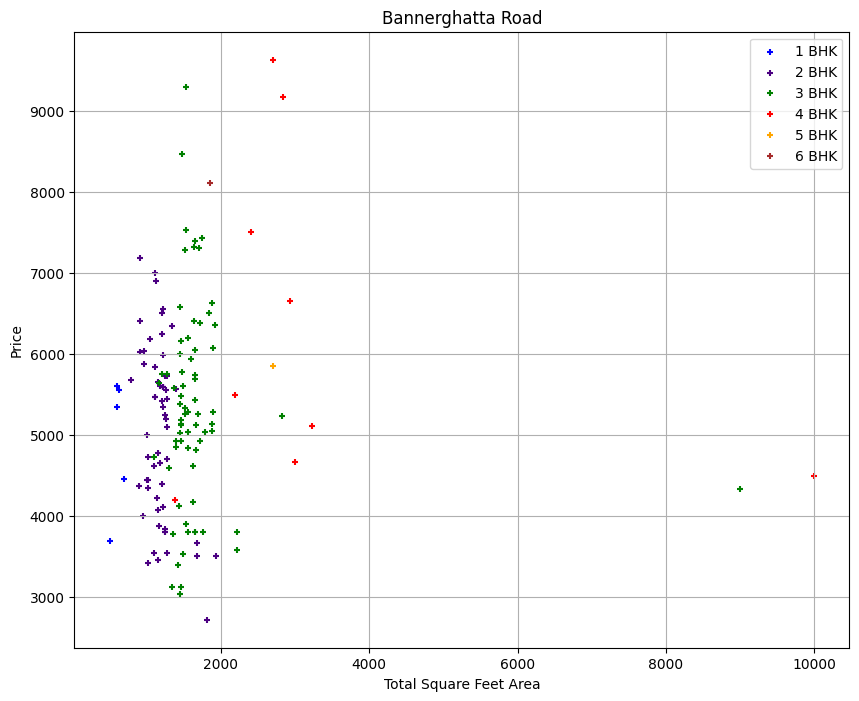

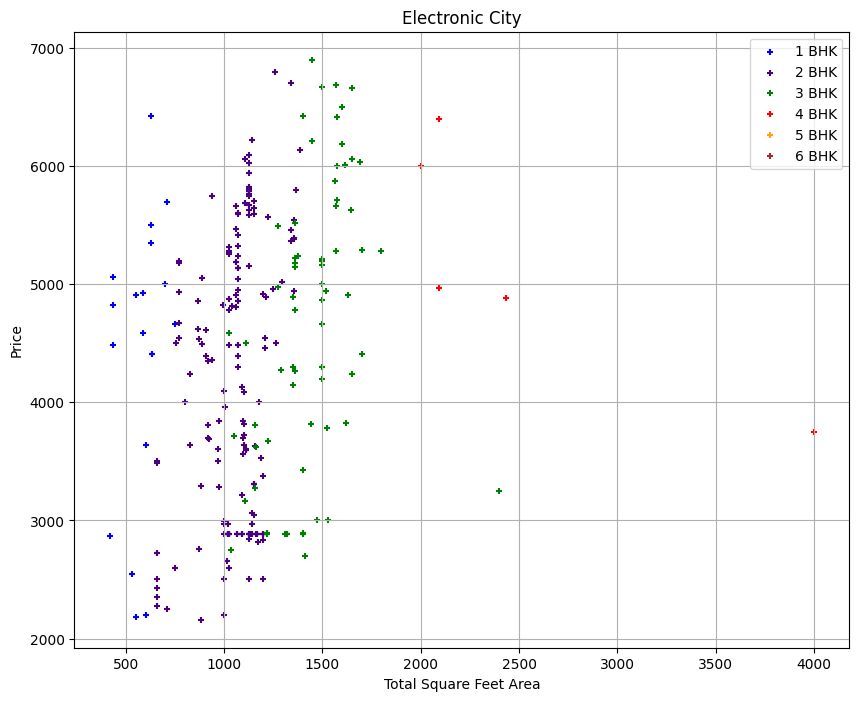

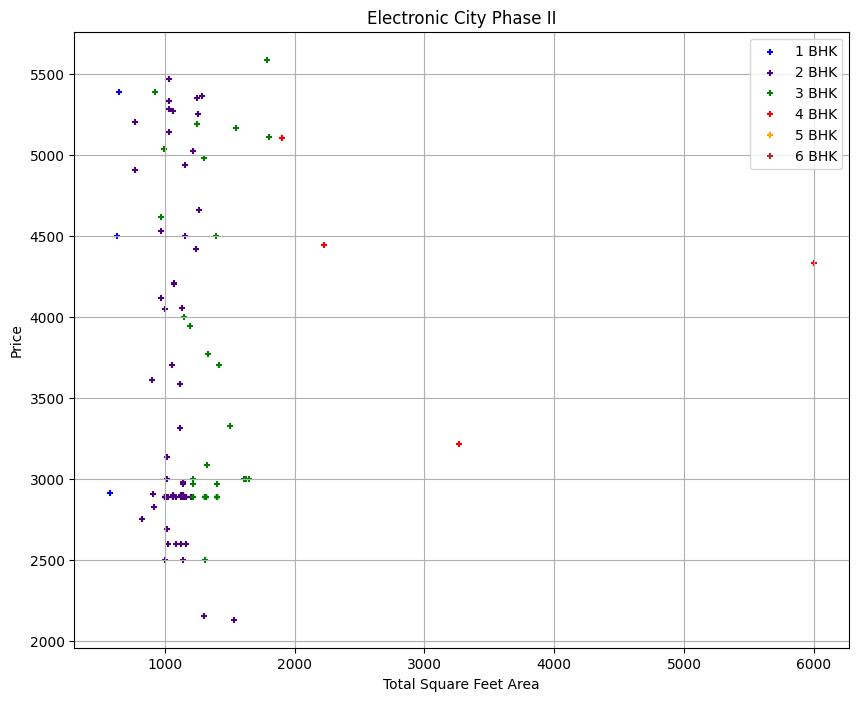

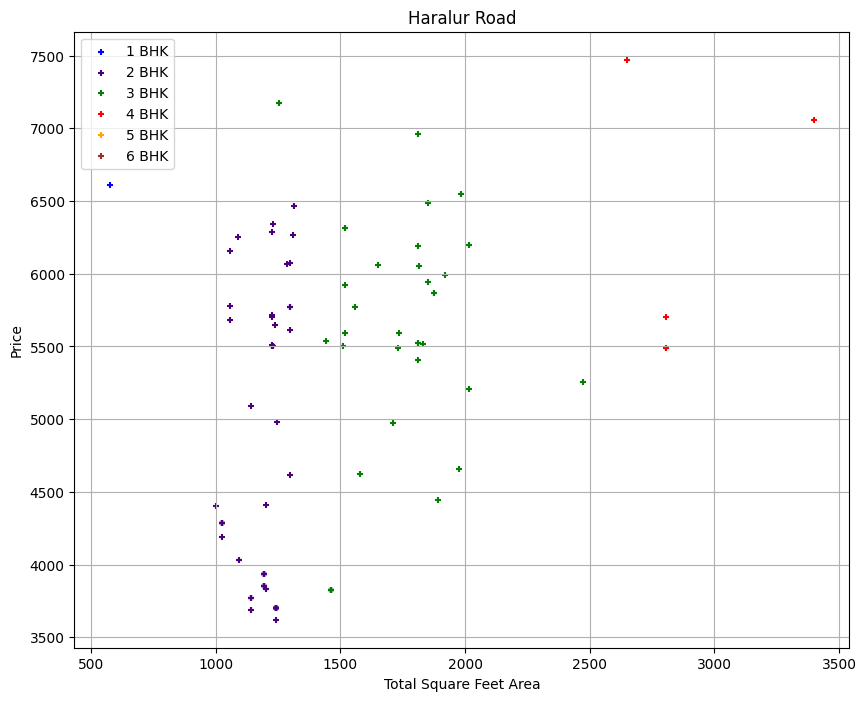

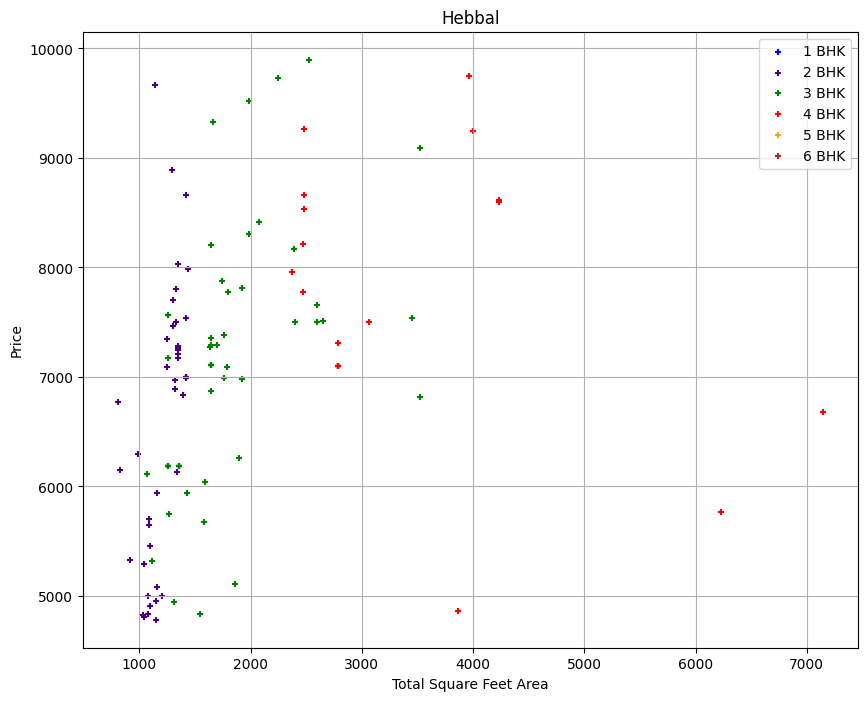

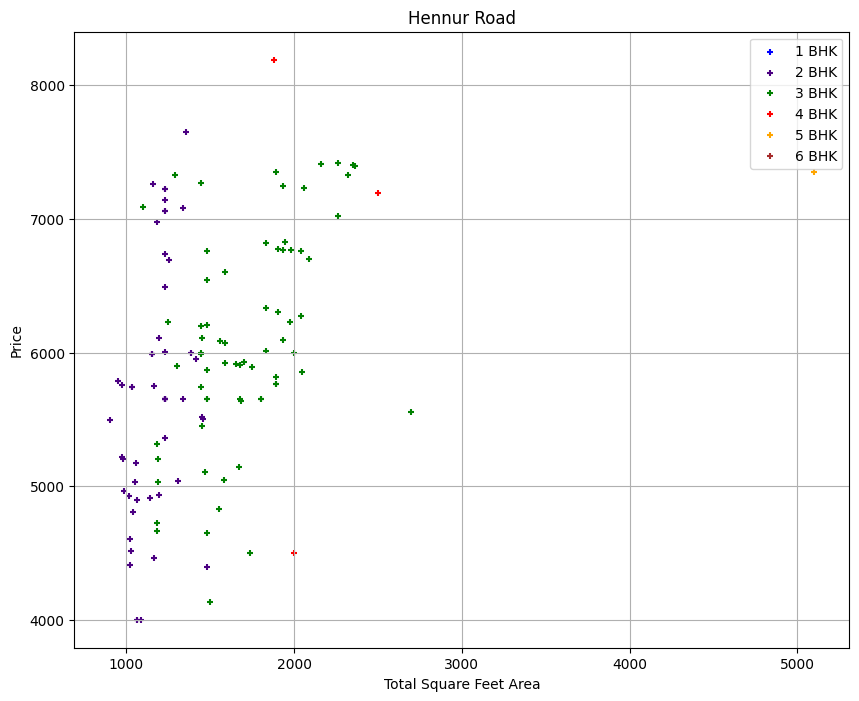

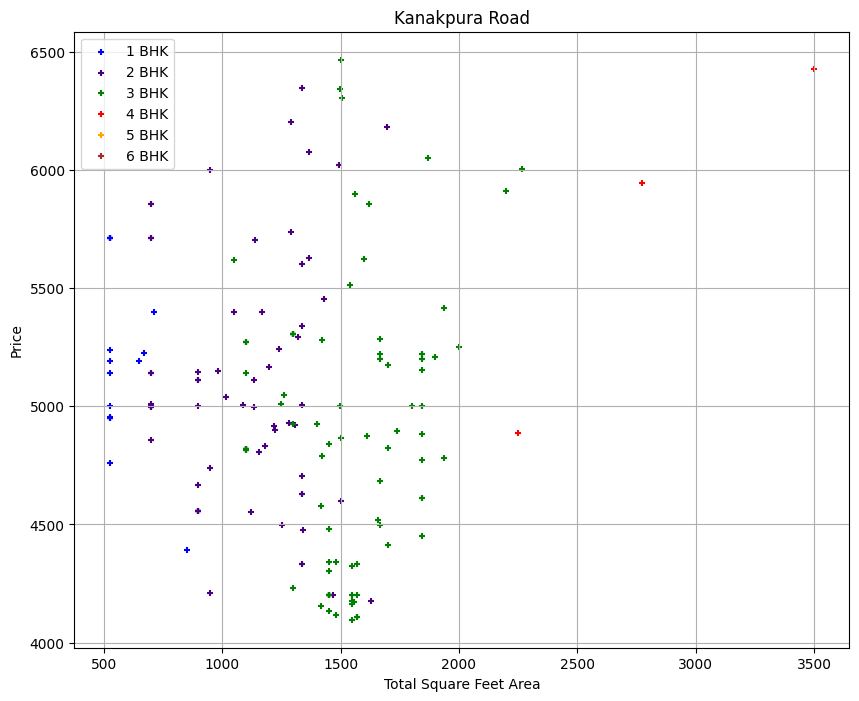

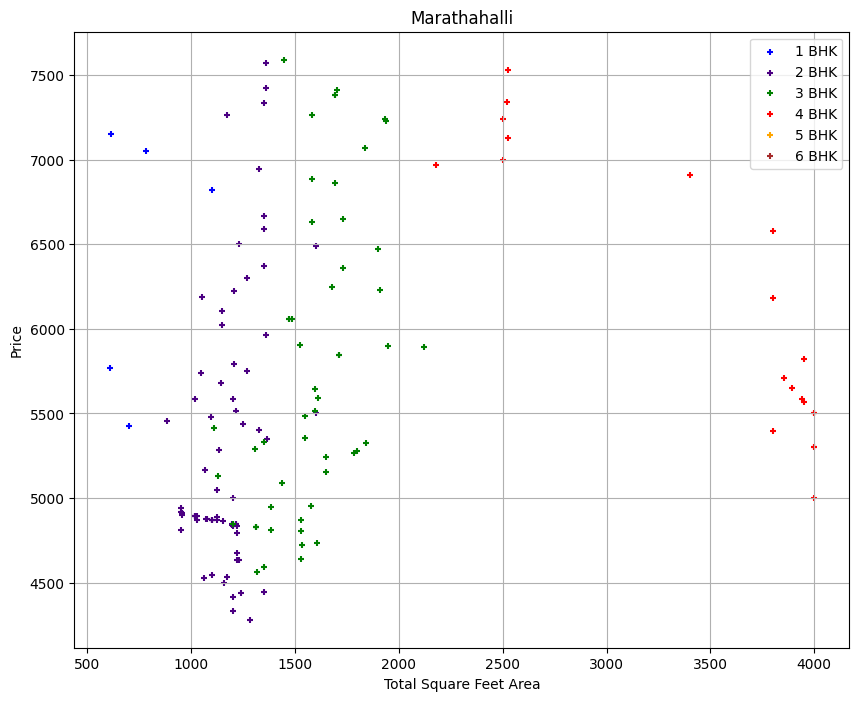

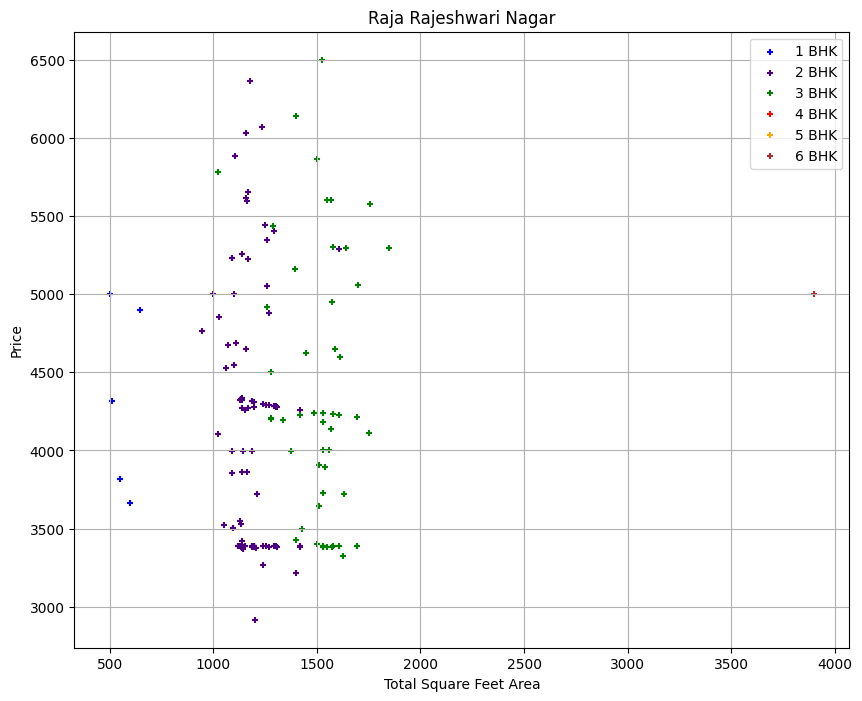

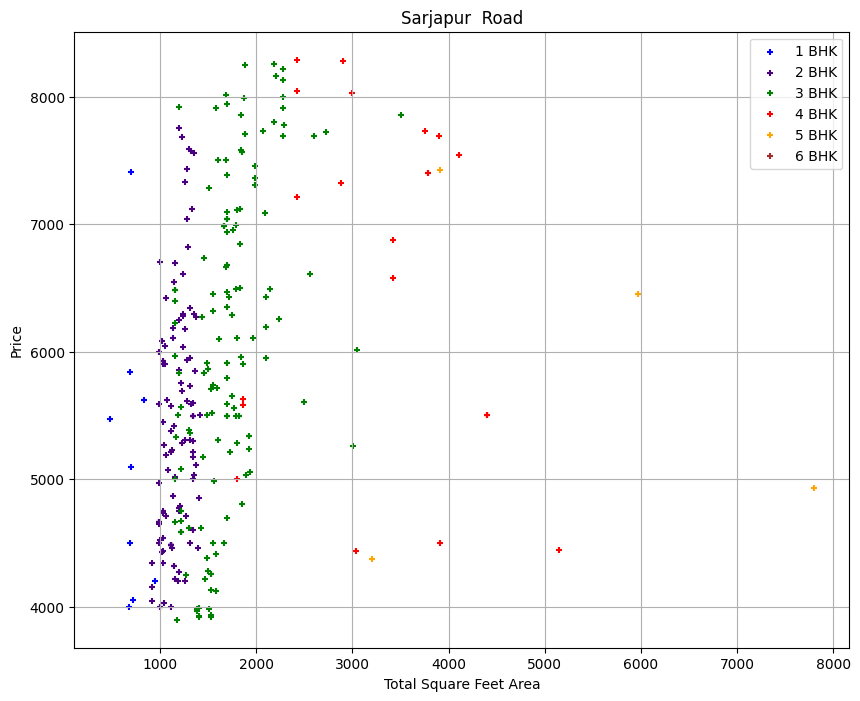

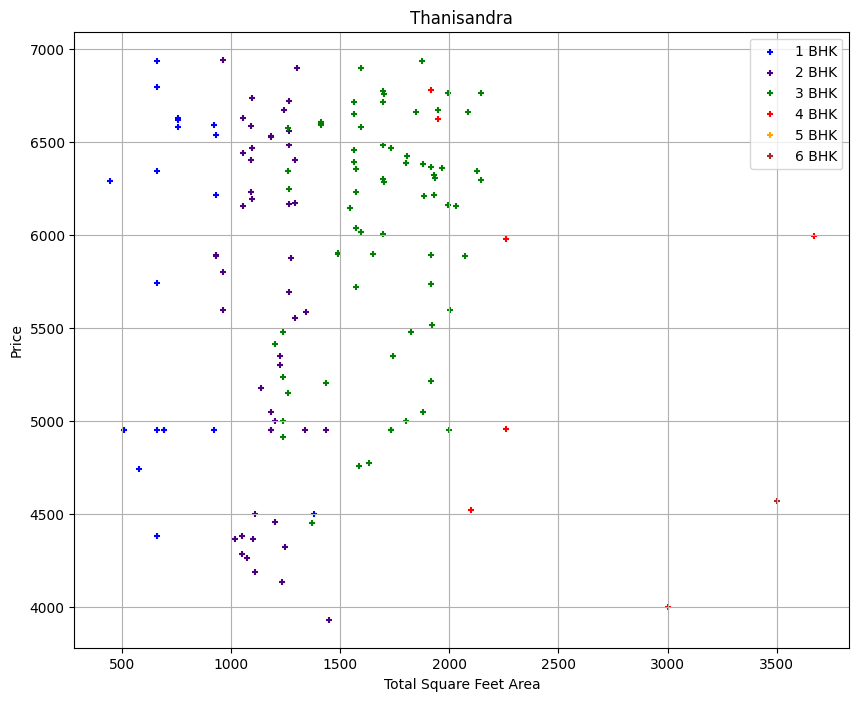

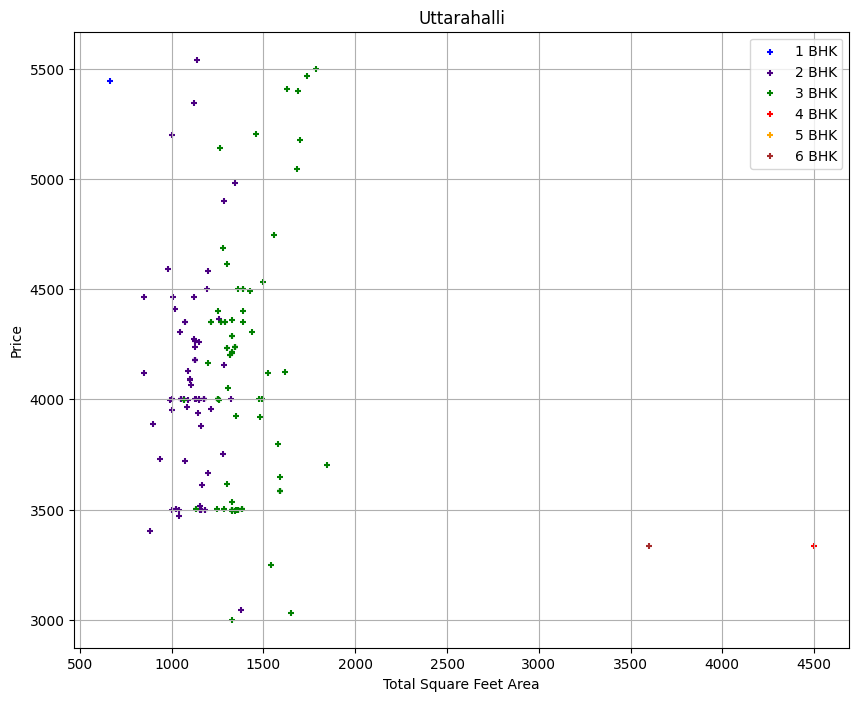

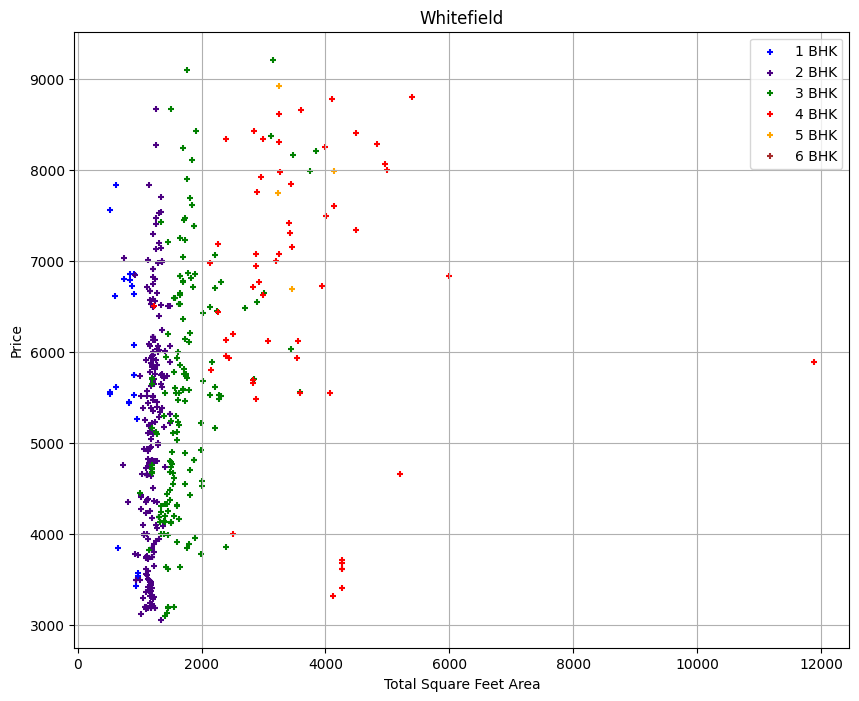

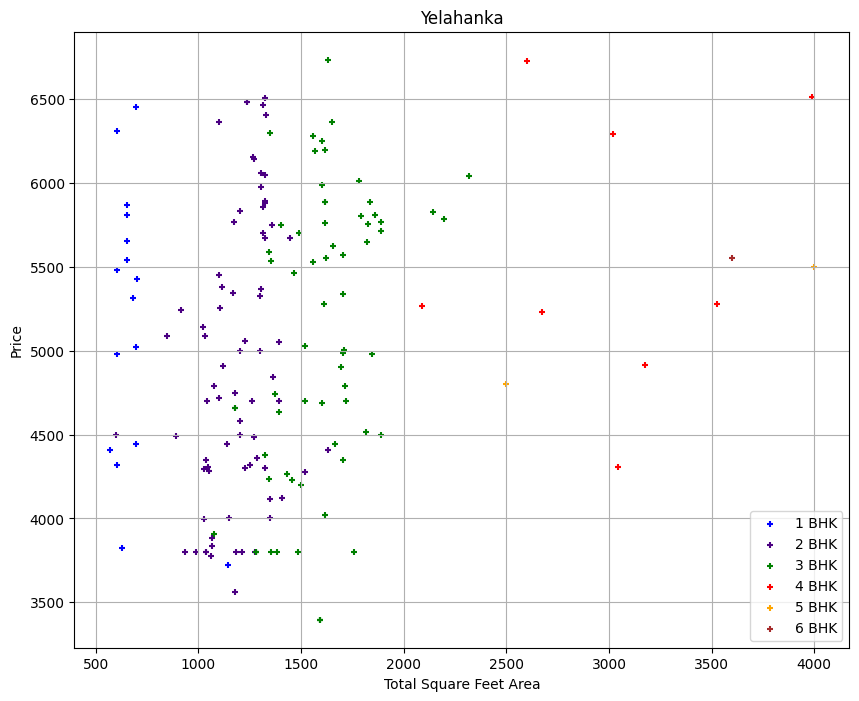

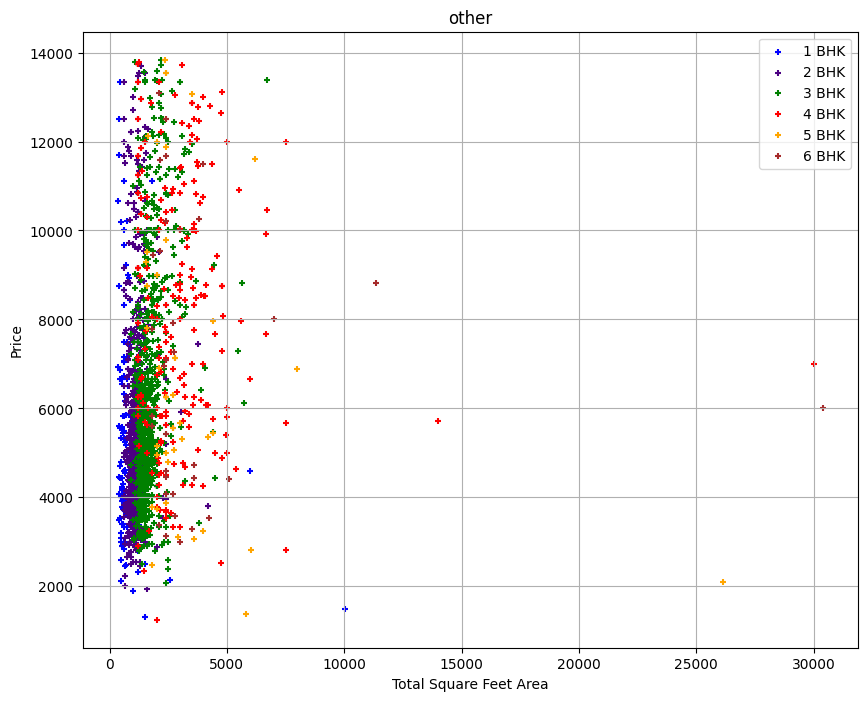

In [45]:
def plot_scatter_chart(real_estate):

    for key, sub in real_estate.groupby("location"):
        locations = real_estate.query("location == @key")
        bhk1 = locations.query("bhk==1")
        bhk2 = locations.query("bhk==2")
        bhk3 = locations.query("bhk==3")
        bhk4 = locations.query("bhk==4")
        bhk5 = locations.query("bhk==5")
        bhk6 = locations.query("bhk==6")
        total_rows = bhk2.shape[0] + bhk3.shape[0]
        
        if (total_rows > 100):
            plt.figure(figsize=(10, 8))
            plt.scatter(bhk1.total_sqft, bhk1.price_per_sqft, marker="+", color="blue", label="1 BHK", s=20)
            plt.scatter(bhk2.total_sqft, bhk2.price_per_sqft, marker="+", color="indigo", label="2 BHK", s=20)
            plt.scatter(bhk3.total_sqft, bhk3.price_per_sqft, marker="+", color="green", label="3 BHK", s=20)
            plt.scatter(bhk4.total_sqft, bhk4.price_per_sqft, marker="+", color="red", label="4 BHK", s=20)
            plt.scatter(bhk5.total_sqft, bhk5.price_per_sqft, marker="+", color="orange", label="5 BHK", s=20)
            plt.scatter(bhk6.total_sqft, bhk6.price_per_sqft, marker="+", color="brown", label="6 BHK", s=20)
            plt.xlabel("Total Square Feet Area")
            plt.ylabel("Price")
            plt.title(key)
            plt.grid()
            plt.legend()

plot_scatter_chart(real_estate_outlier_removed)

In [46]:
def remove_bhk_outliers(real_estate):

    filtered_bhk_outliers = pd.DataFrame()
    
    for location, location_sub in real_estate.groupby("location"):

        locations = []
        filtered_rows = []

        for bhk, bhk_sub in location_sub.groupby("bhk"):
            bhk_mean = np.mean(bhk_sub.price_per_sqft)
            bhk_max = np.max(bhk_sub.price_per_sqft)
            locations.append((bhk, bhk_mean, bhk_max))

        for index, (value, givenprice, max_price) in enumerate(locations):
            length = len(locations)

            if index < length - 1:
                next_price = locations[index + 1][1]

                filter_condition = (real_estate["location"] == location) & (real_estate["bhk"] == value) & (real_estate["price_per_sqft"] < next_price)
                filtered_rows.extend(real_estate[filter_condition].values.tolist())
            else:
                next_price = givenprice
                filter_condition = (real_estate["location"] == location) & (real_estate["bhk"] == value) & (real_estate["price_per_sqft"] < max_price)
                filtered_rows.extend(real_estate[filter_condition].values.tolist())

        filtered_df = pd.DataFrame(filtered_rows, columns=real_estate.columns)
        filtered_bhk_outliers = pd.concat([filtered_bhk_outliers,filtered_df], ignore_index=index)

    return filtered_bhk_outliers

In [47]:
real_estate_bhk = remove_bhk_outliers(real_estate_outlier_removed)

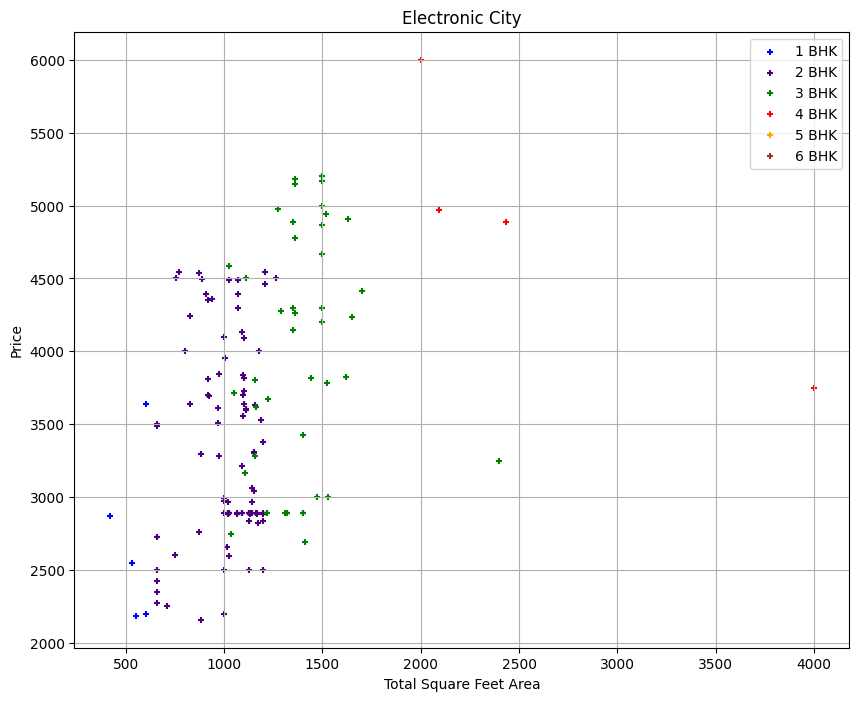

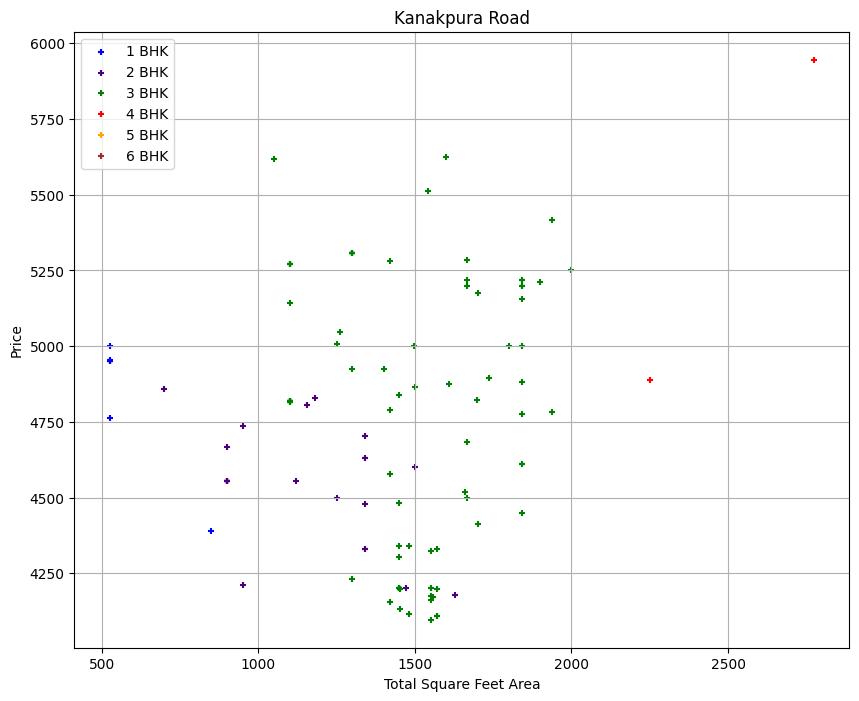

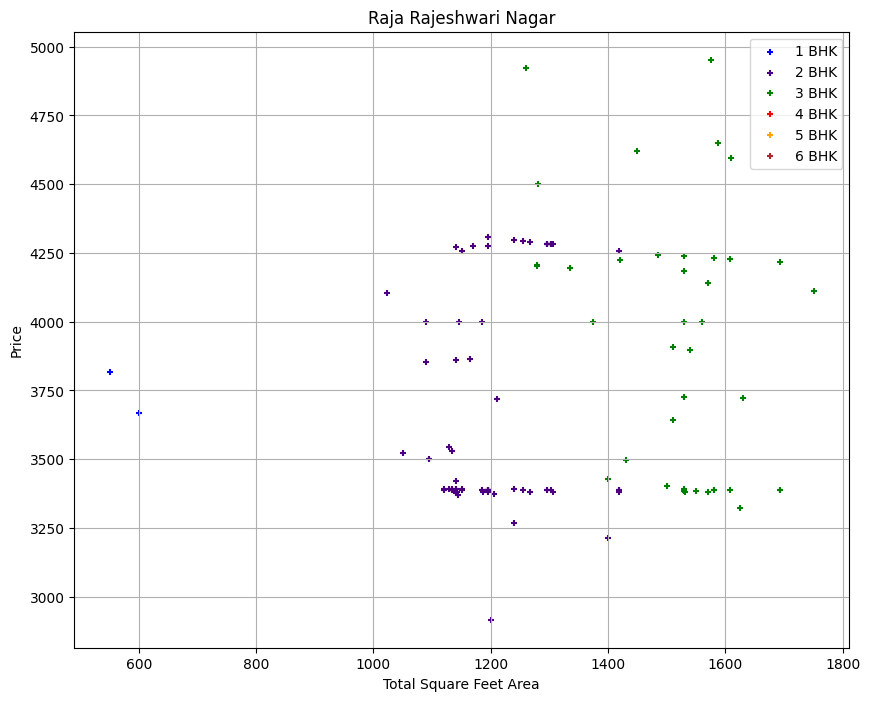

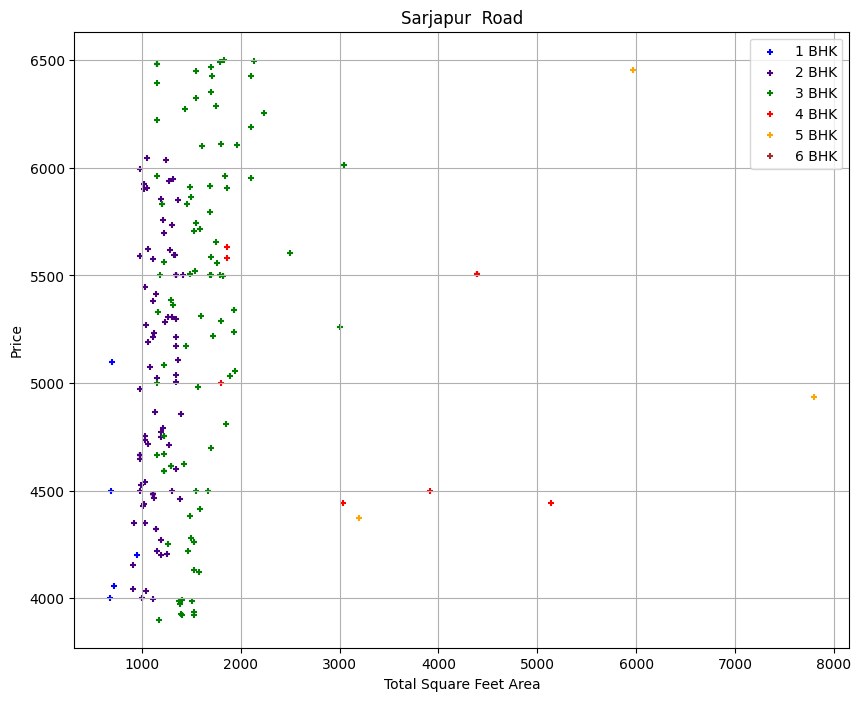

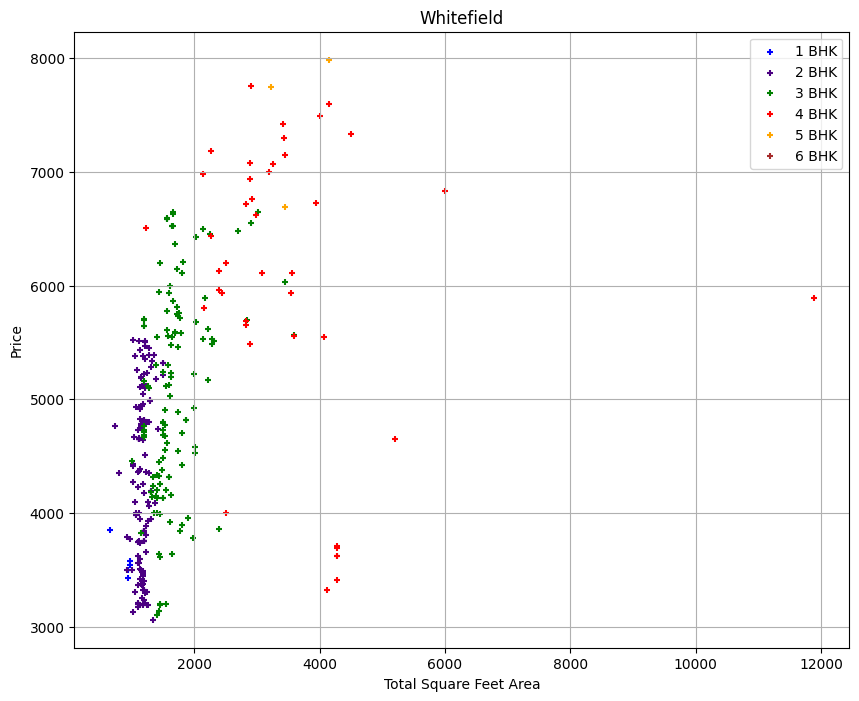

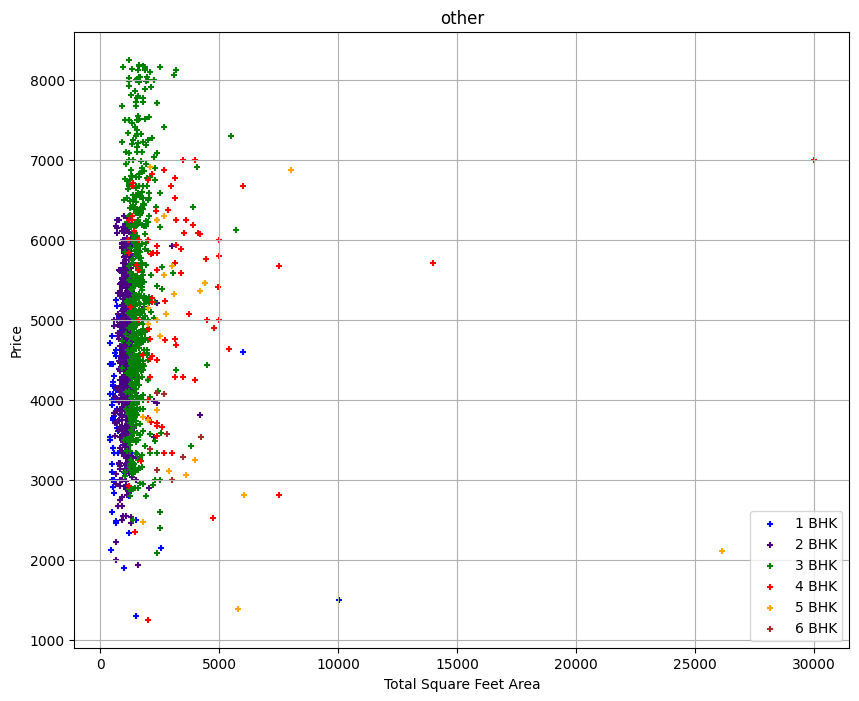

In [48]:
plot_scatter_chart(real_estate_bhk)

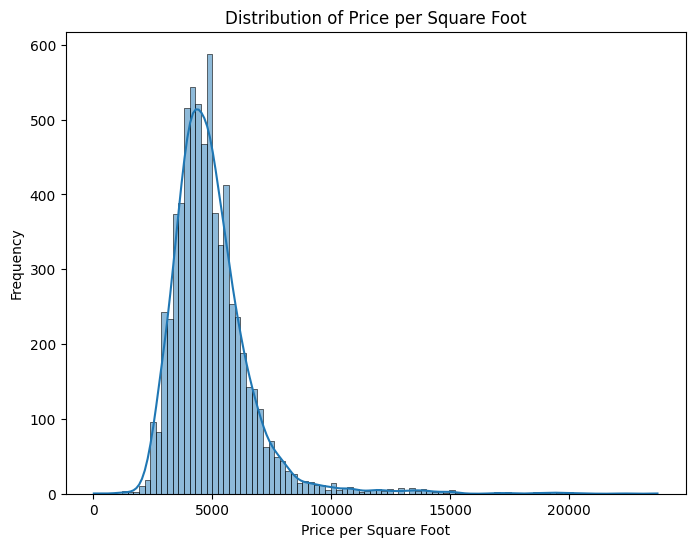

In [49]:
plt.figure(figsize=(8, 6))
sns.histplot(data=real_estate_bhk, x="price_per_sqft", bins=100, kde=True)
plt.xlabel("Price per Square Foot")
plt.ylabel("Frequency")
plt.title("Distribution of Price per Square Foot")
plt.show()

In [50]:
real_estate_bhk['bhk'] = real_estate_bhk['bhk'].astype(int)

In [51]:
real_estate_bath = real_estate_bhk.query("bath < bhk+1")
real_estate_bath.sample(10)

,location,total_sqft,bath,price,bhk,price_per_sqft
3096,Lakshminarayana Pura,1172.0,2.0,75.0,2,6399.317406
5494,other,1000.0,2.0,42.0,2,4200.000000
2644,Kanakpura Road,1050.0,2.0,59.0,3,5619.047619
3657,Raja Rajeshwari Nagar,1050.0,2.0,37.0,2,3523.809524
2647,Kanakpura Road,1843.0,3.0,88.0,3,4774.823657
269,Anekal,456.0,1.0,15.0,1,3289.473684
4140,Sector 7 HSR Layout,1342.0,2.0,115.0,2,8569.299553
1812,Hebbal,919.0,2.0,49.0,2,5331.882481
6555,other,1495.0,2.0,70.0,3,4682.274247
1327,Electronic City,750.0,2.0,19.5,2,2600.000000


In [52]:
real_estate_bath = real_estate_bath.drop(['price_per_sqft'], axis=1)

In [53]:
real_estate_bath.sample(10)

,location,total_sqft,bath,price,bhk
5254,other,900.0,2.0,45.0,2
1376,Electronic City,1500.0,2.0,64.5,3
317,Arekere,920.0,2.0,40.0,2
5750,other,1070.0,2.0,52.0,2
5829,other,1500.0,2.0,60.0,2
2988,Kothanur,1460.0,3.0,71.0,3
4937,Yelahanka,1590.0,2.0,54.0,3
5307,other,1200.0,2.0,53.0,2
501,Bannerghatta Road,500.0,1.0,18.5,1
922,CV Raman Nagar,1435.0,2.0,60.0,3


In [54]:
dummies = pd.get_dummies(real_estate_bath.location)

In [55]:
real_estate_final = pd.concat([real_estate_bath, dummies.drop("other", axis=1)], axis=1)

In [56]:
real_estate_final = real_estate_final.drop("location", axis=1)

In [57]:
real_estate_final.sample(10)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
2358,1252.0,3.0,61.00,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2272,1078.0,2.0,45.00,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4552,937.0,1.0,32.15,1,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
534,1460.0,2.0,90.00,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
666,924.0,2.0,35.11,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5971,1464.0,3.0,56.00,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5755,1050.0,2.0,35.00,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5115,1050.0,1.0,32.39,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4531,750.0,1.0,30.00,1,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2218,1200.0,4.0,75.00,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [58]:
X = real_estate_final.drop('price', axis=1)

In [59]:
y = real_estate_final.price
y.head()

0    194.0
1    235.0
2    130.0
3    428.0
4    413.0
Name: price, dtype: float64

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [61]:
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test,y_test)

0.6010938762661692

In [62]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.60674791, 0.61782757, 0.28580763, 0.74735764, 0.54556237])

In [63]:
model_params = {
       'XGBoost':{
        'model':XGBRegressor(),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.1],
            'max_depth': [7],
            'min_child_weight': [1],
            'gamma': [0.1],
            'reg_alpha': [0.1],
            'reg_lambda': [1]
        },
    },
        'CatBoost':{
        'model':CatBoostRegressor(),
        'params':{
            'max_leaves': [8],
           'depth': [3],
           'od_wait': [200],
           'l2_leaf_reg': [3],
          'iterations': [4000, 7000],
           'model_size_reg': [0.7],
           'learning_rate': [0.01],
           'random_seed': [42]
           }
        }
}

In [64]:
# Apply shuffleSplit
sh_cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

# Initialize GridSearchCV
best_model_name = None
best_model = None
best_params = None
best_score = float('inf')

scores = []

for model_name, model in model_params.items():
    grid = GridSearchCV(estimator=model["model"], param_grid=model["params"], cv=sh_cv, scoring="neg_mean_squared_error", return_train_score=False, n_jobs=-1, verbose=2)
    grid.fit(X, y)

    models = model_name
    current_best_score = np.sqrt(-1 * (grid.best_score_))

    print(f"Best parameters for {models} : {grid.best_params_}")
    print(F"Best RMSE for {models} is {current_best_score} \n")

    scores.append({
        'models':models,
        'best_params': grid.best_params_,
        'best_score': current_best_score
    })

    # Best model with best parameters
    if current_best_score < best_score:
        best_score = current_best_score
        best_model_name = model_name
        best_model = grid.best_estimator_
        best_params = grid.best_params_

print(f"The best model is {best_model_name} with parameters {best_params}")
pd.DataFrame(scores, columns=list(scores[0].keys()))

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters for XGBoost : {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 1}
Best RMSE for XGBoost is 28.29970331588938 

Fitting 5 folds for each of 2 candidates, totalling 10 fits
0:	learn: 61.8839255	total: 131ms	remaining: 15m 19s
1:	learn: 61.5791575	total: 133ms	remaining: 7m 44s
2:	learn: 61.2811366	total: 134ms	remaining: 5m 13s
3:	learn: 60.9816374	total: 135ms	remaining: 3m 56s
4:	learn: 60.6965353	total: 137ms	remaining: 3m 11s
5:	learn: 60.4158872	total: 138ms	remaining: 2m 40s
6:	learn: 60.1278744	total: 139ms	remaining: 2m 19s
7:	learn: 59.8446489	total: 141ms	remaining: 2m 2s
8:	learn: 59.5870440	total: 142ms	remaining: 1m 50s
9:	learn: 59.3158012	total: 143ms	remaining: 1m 40s
10:	learn: 59.0457687	total: 144ms	remaining: 1m 31s
11:	learn: 58.7859892	total: 146ms	remaining: 1m 24s
12:	learn: 58.5169253	total: 147ms	remaining: 1

,models,best_params,best_score
0,XGBoost,"{'gamma': 0.1, 'learning_rate': 0.1, 'max_dept...",28.299703
1,CatBoost,"{'depth': 3, 'iterations': 7000, 'l2_leaf_reg'...",30.386610


In [65]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=241)

In [66]:
np.where(X.columns=='2nd Phase Judicial Layout')[0][0]

5

In [67]:
def predict_price(location, sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk

    if loc_index >=0:
        x[loc_index] = 1
        
    return lr_clf.predict([x])[0]

In [68]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

c:\Users\REDTECH\anaconda3\envs\mycourseraenv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


103.48109416598719

In [69]:
predict_price('1st Phase JP Nagar', 1000, 3, 3)


c:\Users\REDTECH\anaconda3\envs\mycourseraenv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


140.62933343953299

In [70]:
# Save the best model to pickle
with open('real_estate_model.pickle', 'wb') as f:
    pickle.dump(best_model,f)

In [71]:
# Save the encoded columns to json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}

with open("columns.json", "w") as f:
    f.write(json.dumps(columns))